In [1]:
import pandas as pd
import investpy as inv
import scrapy
import requests
from bs4 import BeautifulSoup
import re

from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

In [3]:
#getting all stocks symbols 
br = inv.stocks.get_stocks(country='brazil')

In [4]:
br.head()

,country,name,full_name,isin,currency,symbol
0,brazil,ABC BRASIL PN,Banco ABC Brasil SA,BRABCBACNPR4,BRL,ABCB4
1,brazil,BRASILAGRO ON,BrasilAgro - Co ON NM,BRAGROACNOR7,BRL,AGRO3
2,brazil,RUMO ON NM,RUMO Logistica Operadora Multimodal SA,BRRAILACNOR9,BRL,RAIL3
3,brazil,ALPARGATAS ON,Alpargatas SA,BRALPAACNOR0,BRL,ALPA3
4,brazil,ALPARGATAS PN,Alpargatas SA,BRALPAACNPR7,BRL,ALPA4


In [3]:
#user name and password in the site statusinvest to login and get the data
username = ""
password = ""

In [4]:
#current date and time to compare against the data
from datetime import datetime

# datetime object containing current date and time
now = datetime.now()
 
print("now =", now)

# dd/mm/YY H:M:S
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
print("date and time =", dt_string)
dt_string

now = 2023-02-10 18:56:32.885038
date and time = 10/02/2023 18:56:32


'10/02/2023 18:56:32'

In [7]:
%%time
#getting the data
from datetime import datetime

# datetime object containing current date and time
now = datetime.now()
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")

url = 'https://statusinvest.com.br/'

driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get(url)
driver.implicitly_wait(10)
#login
driver.find_element(By.XPATH, value='/html/body/header/nav/div/div/div/ul/li[10]/div[2]/button').click()
user = driver.find_element(By.XPATH, value='/html/body/div[7]/div[1]/div/form/div[2]/input')
pass_ = driver.find_element(By.XPATH, value='/html/body/div[7]/div[1]/div/form/div[3]/input')
entrar = driver.find_element(By.XPATH, value='/html/body/div[7]/div[1]/div/form/div[6]/div[1]/button[2]')
user.send_keys(username)
pass_.send_keys(password)
entrar.click()

#Go to news
driver.find_element(By.XPATH, value='/html/body/main/section[2]/div/div[4]/a').click()
#Abaixo não estava conseguindo clicar, então foi necessário esperar o carregamento até ser clicável
driver.execute_script("arguments[0].click();", WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH, "/html/body/main/div[3]/div[1]/div[2]/div/a/span"))))
try:
    element = WebDriverWait(driver, 2).until(
        EC.presence_of_element_located((By.XPATH, "/html/body/section/main/div[2]/div[2]/div/div[3]/ul/li[3]/a"))
    )
except:
    driver.refresh()
    element = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.XPATH, "/html/body/section/main/div[2]/div[2]/div/div[3]/ul/li[3]/a"))
    )

info={}
info['date_now'] = dt_string 
count=0
count_break = []
while count < 6*1000:
    if count % 10 == 0:
        print(count)
    
    if count not in count_break:
        count_break=[]
    else:
        count_break.append(count)
        if len(count_break) > 1:
            print('repeat')
            driver.refresh()
            #break
    try:
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        titles = [i.text.split('\n')[1] for i in soup.find_all('div', class_="title pl-xs-2")]
        if len(titles) > 6:
            titles = titles[:6]
        dates = [i.text[1:-1] for i in soup.find_all('div', class_="date")][:6]
        #print(dates)
        #driver.execute_script("arguments[0].click();", WebDriverWait(driver, 20).until(EC.text_to_be_present_in_element(locator=(By.XPATH,"/html/body/section/main/div[2]/div[2]/div/div[2]/div[1]/div/div[2]/div[1]"),text_=' ')))
        i = 1
        while i <= 6: 
            
            try:
                
                info_temp={}
                
                info_temp['title'] = titles[i-1]
                info_temp['date'] = dates[i-1]
                
                driver.find_element(By.XPATH, value='/html/body/section/main/div[2]/div[2]/div/div[2]/div['+str(i)+']/div/div[2]/div[1]').click()
                driver.find_element(By.XPATH, value='/html/body/div[11]/div[2]/div/div[1]/div/div[2]')
                soup2 = BeautifulSoup(driver.page_source, 'html.parser')
                
                text = soup2.find_all('div', class_="post-content")[0].text
                info_temp['text'] = text
                
                info[count]=info_temp
                
                driver.find_element(By.XPATH, value='/html/body/div[11]/div[1]/button').click()
                
                count+=1
                i+=1
            except:
                try:
                    driver.find_element(By.XPATH, value='/html/body/div[12]/div/div/div[1]/button').click()
                except:
                    #driver.refresh()
                    continue
        driver.find_element(By.XPATH, value='/html/body/section/main/div[2]/div[2]/div/div[3]/ul/li[9]/a').click()
    except:
        continue
        
driver.quit()

<timed exec>:9: DeprecationWarning: executable_path has been deprecated, please pass in a Service object


0
30
60
90
120
150
180
210
240
270
300
330
360
390
420
450
480
510
540
570
600
630
660
690
720
750
780
810
840
870
900
930
960
990
1020
1050
1080
1110
1140
1170
1200
1230
1260
1290
1320
1350
1380
1410
1440
1470
1500
1530
1560
1590
1620
1650
1680
1710
1740
1770
1800
1830
1860
1890
1920
1950
1980
2010
2040
2070
2100
2130
2160
2190
2220
2250
2280
2310
2340
2370
2400
2430
2460
2490
2520
2550
2580
2610
2640
2670
2700
2730
2760
2790
2820
2850
2880
2910
2940
2970
3000
3030
3060
3090
3120
3150
3180
3210
3240
3270
3300
3330
3360
3390
3420
3450
3480
3510
3540
3570
3600
3630
3660
3690
3720
3750
3780
3810
3840
3870
3900
3930
3960
3990
4020
4050
4080
4110
4140
4170
4200
4230
4260
4290
4320
4350
4380
4410
4440
4470
4500
4530
4560
4590
4620
4650
4680
4710
4740
4770
4800
4830
4860
4890
4920
4950
4980
5010
5040
5070
5100
5130
5160
5190
5220
5250
5280
5310
5340
5370
5400
5430
5460
5490
5520
5550
5580
5610
5640
5670
5700
5730
5760
5790
5820
5850
5880
5910
5940
5970
CPU times: user 11min 22s, sys: 2.59 s,

In [8]:
len(info.keys())

6001

In [11]:
pd.DataFrame(info)

,date_now,0,1,2,3,4,5,6,7,8,...,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
title,10/02/2023 19:00:53,"Ibovespa fecha quase estável, com Petrobras (P...",Ibovespa fecha a semana aos 108 mil pontos; Br...,Banco do Brasil (BBAS3) deve ser grande estrel...,De Eletrobras (ELET3) à crise em distribuidora...,Solução para crises na Light (LIGT3) e Amazona...,"TIM (TIMS3) encolhe nos lucros do 4T22, mas aç...","Ibovespa fecha quase estável, com Petrobras (P...",Ibovespa fecha a semana aos 108 mil pontos; Br...,Banco do Brasil (BBAS3) deve ser grande estrel...,...,Bradesco BBI corta para 40% as chances da Petr...,Itaú (ITUB4) deve lucrar mais de R$ 8 bilhões ...,"Ibovespa cai 1,47% e fecha semana aos 108 mil ...","Ibovespa cai 1,47%, com falas de Lula e exteri...",Oi (OIBR3;OIBR4): S&P reduz rating da empresa ...,Americanas (AMER3): conselho decide afastar di...,"IFIX avança 0,22% na semana, VSLH11 desaba 12,...",Americanas (AMER3) afasta diretores e executiv...,Reservas confirmadas da CVC (CVCB3) crescem 14...,BNDES aprova Rafael Lucchesi como novo preside...
date,10/02/2023 19:00:53,há 14 minutos,há 33 minutos,há 50 minutos,há 1 hora,há 2 horas,há 4 horas,há 14 minutos,há 33 minutos,há 50 minutos,...,há 7 dias,há 7 dias,há 7 dias,há 7 dias,há 7 dias,há 7 dias,há 7 dias,há 7 dias,há 7 dias,há 7 dias
text,10/02/2023 19:00:53,"Ibovespa fecha quase estável, com Petrobras (P...",Ibovespa fecha a semana aos 108 mil pontos; Br...,Banco do Brasil (BBAS3) deve ser grande estrel...,De Eletrobras (ELET3) à crise em distribuidora...,Solução para crises na Light (LIGT3) e Amazona...,"TIM (TIMS3) encolhe nos lucros do 4T22, mas aç...",Google (GOGL34) confirma demissões no Brasil e...,Americanas (AMER3) comunica shoppings que não ...,Usiminas (USIM5) projeta custos e investimento...,...,"IFIX avança 0,22% na semana, VSLH11 desaba 12,...",Americanas (AMER3) afasta diretores e executiv...,Reservas confirmadas da CVC (CVCB3) crescem 14...,BNDES aprova Rafael Lucchesi como novo preside...,CVM estuda ampliar horário de funcionamento do...,CVC (CVCB3): reservas confirmadas subiram 14% ...,Oi deve R$ 35 bi e corre risco de sofrer inter...,6 ações baratas que pagam dividendos acima da ...,Crise da Americanas (AMER3) se agrava e Ambev ...,"Lemann, Telles e Sicupira vêm ao Brasil para s..."


In [2]:
df = pd.read_pickle('info.pkl')
df = df.transpose()

In [246]:
#use chatgpt to classify the news in good, bad or neuter
import requests
import os
import json

def bearer_oauth(r):
    """
    Method required by bearer token authentication.
    """
    r.headers["Content-Type"] =  "application/json"
    r.headers["Authorization"] =  "Bearer " + key
    return r

#text = 'Cada dia que passar está pior. Eu muita das vezes andei até o outro lada de Edson Passos, isso pra não perder consulta médica.😡'
#text = 'Prefeitura sempre trabalhando na melhorias para população!!'
def gpt(news):  
    payload = {
        "model": "text-davinci-003",
        "prompt": "Responda em uma palavra. A notícia: "+ news + "é boa, ruin ou neutra do ponto de vista econômico?",
        "max_tokens": 1000,
        "temperature": 0.0 
        }
    
    
    url = "https://api.openai.com/v1/completions"
    
    response = requests.request("POST", url, auth=bearer_oauth, json = payload)
    #print(response.status_code)
    resp = response.json()
    return resp["choices"][0]["text"]

In [3]:
import time

In [248]:
%%time
sent = []
for i in range(len(df)):
    if i%100 == 0:
        print(i)
    try:
        sent.append(gpt(df.title.values[i]))
    except:
        sent.append('ND')

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
CPU times: user 3min 31s, sys: 8.48 s, total: 3min 39s
Wall time: 1h 12min 13s


In [214]:
sent[43]

'ND'

In [252]:
#try again for error in the chatgpt request
for i in range(len(sent)):
    if sent[i] == 'ND':
        print(i)
        try:
            sent[i] = gpt(df.title.values[i])
        except:
            continue

In [253]:
df['sentiment'] = sent

In [255]:
#df.to_pickle('info2.pkl')

In [247]:
gpt('Ibovespa fecha a semana aos 108 mil pontos; Bradesco (BBDC4) e Alpargatas (ALPA4) derretem após balanços')

'\n\nNeutra.'

In [201]:
sent[28]

'ND'

In [243]:
df.title.values[8], df.sentiment.values[8]

('Ibovespa fecha a semana aos 108 mil pontos; Bradesco (BBDC4) e Alpargatas (ALPA4) derretem após balanços',
 '\n\nNeutra.')

# Start cleaning data

In [2]:
import re

In [8]:
import itertools
list2d = [[1,2,3], [4,5,6], [7], [8,9]]
list(itertools.chain(*list2d))

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [4]:
df = pd.read_pickle('info2.pkl')
#df = df.transpose()

In [5]:
sent_list = df.sentiment.apply(lambda x: x[2:])

In [9]:
#get stocks mentioned in each news
temp = df.text.apply(lambda x: re.findall(r'\([A-Z][A-Z][A-Z][A-Z][0-9].*?\)', x))[1:]
temp = temp.apply(lambda x: [stock[1:5].split(';') for stock in x])
temp = temp.apply(lambda x: list(itertools.chain(*x)))
temp = temp.apply(lambda x: [i.strip() for i in x if len(i) < 7])

In [12]:
temp = temp.apply(lambda x: [tuple(sorted(pair)) for pair in list(itertools.combinations(x, 2))]).explode()

In [13]:
temp_sent = []
for i in temp.index:
    temp_sent.append(sent_list[i])

In [47]:
sent_dict = {'Neutra.':'Neuter',
             'Desafio.':'Neuter',
             'Variada.':'Neuter',
             'Mista.':'Neuter',
             'Útil.':'Neuter',
             'eutra.':'Neuter',
             'eutro.':'Neuter',
             'Volatilidade.':'Neuter',
             'Imprevisível.': 'Neuter',
             'Boa.': 'Positive',
             'Sim.': 'Positive',
             'Otimista.': 'Positive',
             'Positiva.': 'Positive',
             'Atrativa.': 'Positive',
             'Ruin.': 'Negative',
             'Ruim.': 'Negative',
             'Risco.': 'Negative'}

In [48]:
# Get sentiment distribution for each stock
stock_sentiment = {}
counter = 0
for pair in temp.values:
    if type(pair) == tuple:
        for stock in pair:
            if stock not in stock_sentiment:
                stock_sentiment[stock] = [sent_dict[temp_sent[counter]]]
            else:
                stock_sentiment[stock].append(sent_dict[temp_sent[counter]])
        counter+=1
    else:
        counter+=1
        continue

In [32]:
temp_dict = temp.value_counts().to_dict()

# Começando algumas visualizações

In [40]:
#connect stocks appearing in the same news
edges = [[i[0][0],i[0][1],i[1]] for i in temp_dict.items() if i[0][0] != i[0][1]]
k=list(temp_dict.keys())
sentiments = [temp_sent[i] for i in range(len(temp_dict)) if k[i][0]!=k[i][1]]

In [58]:
sent_dict = {'Neutra.':'Gray',
             'eutra.':'Gray',
             'Volatilidade.':'Gray',
             'Boa.': 'Blue',
             'Otimista.': 'Blue',
             'Ruin.': 'Red',
             'Ruim.': 'Red',
             'Risco.': 'Red'}

In [59]:
sent_colors = [sent_dict[sent] for sent in sentiments]

In [60]:
import networkx as nx
import matplotlib.pyplot as plt

In [61]:
#create graph
G = nx.Graph()
G.add_weighted_edges_from(edges)

In [151]:
#sub = [i for i in nx.connected_components(G)]

In [87]:
weights = [i[2]['weight']/2 for i in G.edges(data=True)]

In [82]:
deg = [G.degree(i) for i in G.nodes()]

In [92]:
labels = [l for l in G.nodes()]

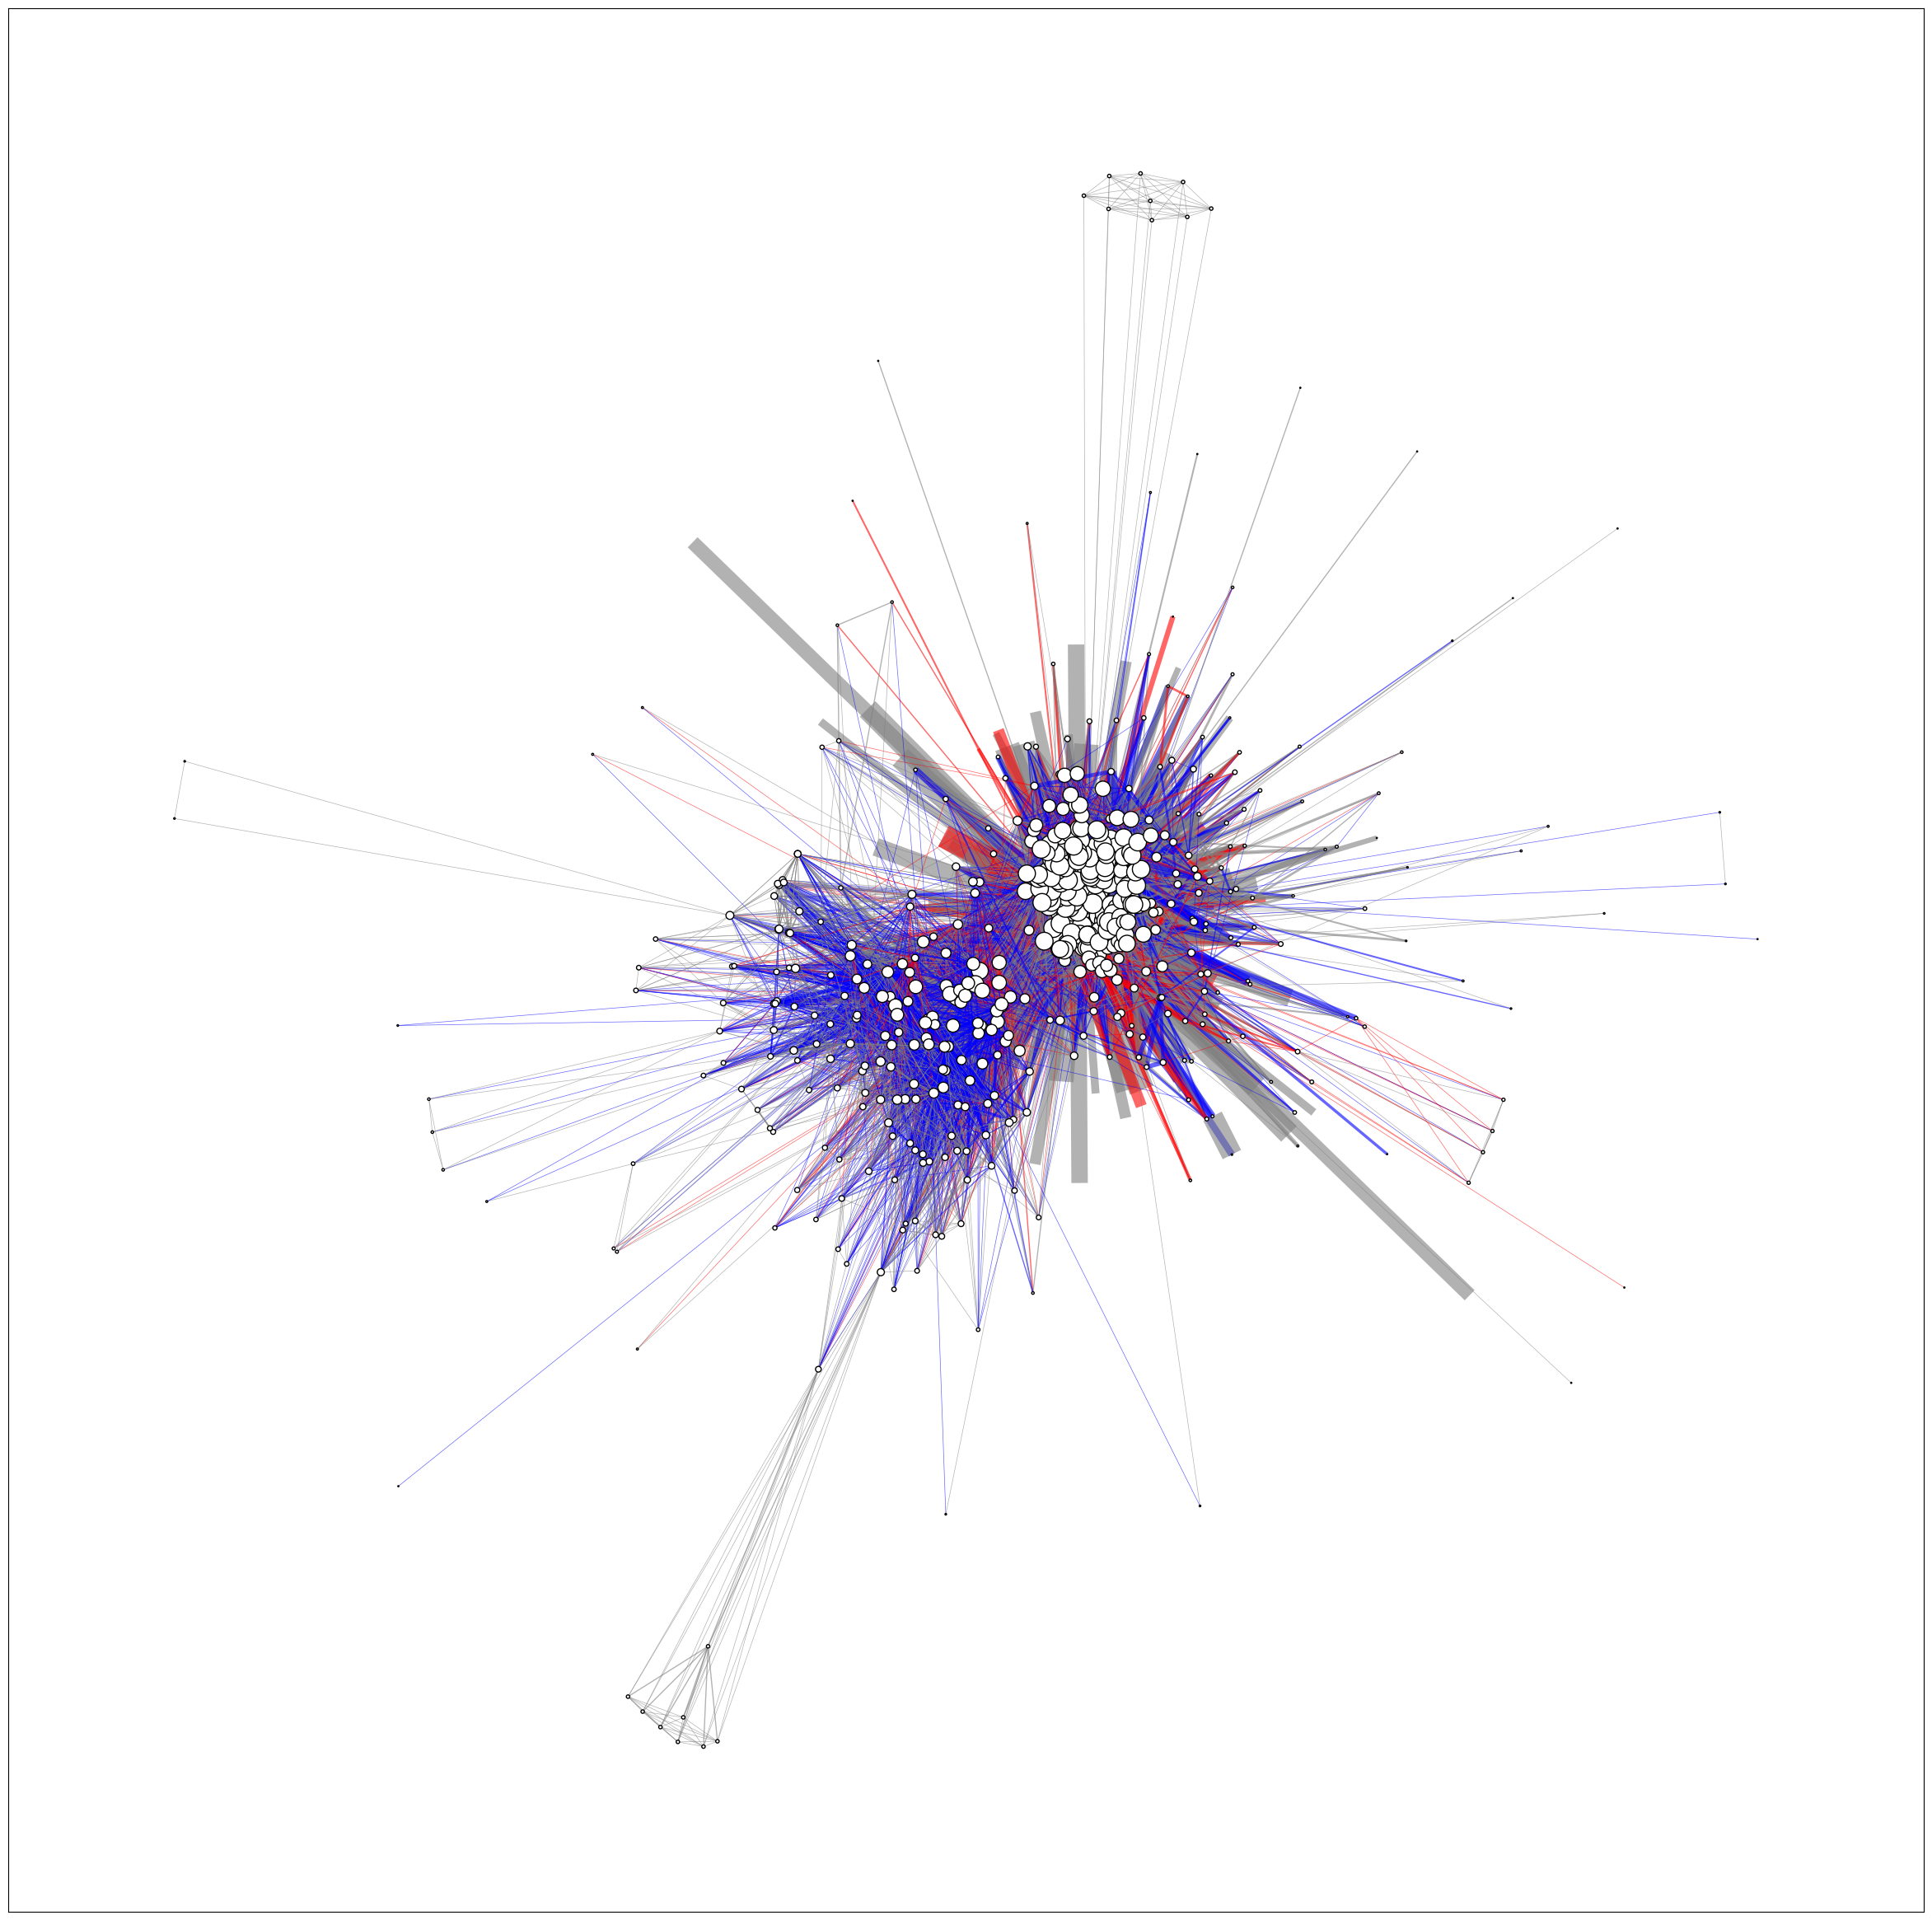

In [100]:
fig, ax = plt.subplots(figsize = (30, 30))
pos = nx.spring_layout(G, seed=63)
nx.draw_networkx_edges(G, pos, edgelist=None, width=weights, edge_color=sent_colors, style='solid', alpha=0.6)
nx.draw_networkx_nodes(G, pos, nodelist=None, node_size=deg, node_color='w', edgecolors='k')
#nx.draw_networkx_labels(G, pos, labels=None)
plt.savefig('fst_visualization.pdf')
plt.show()

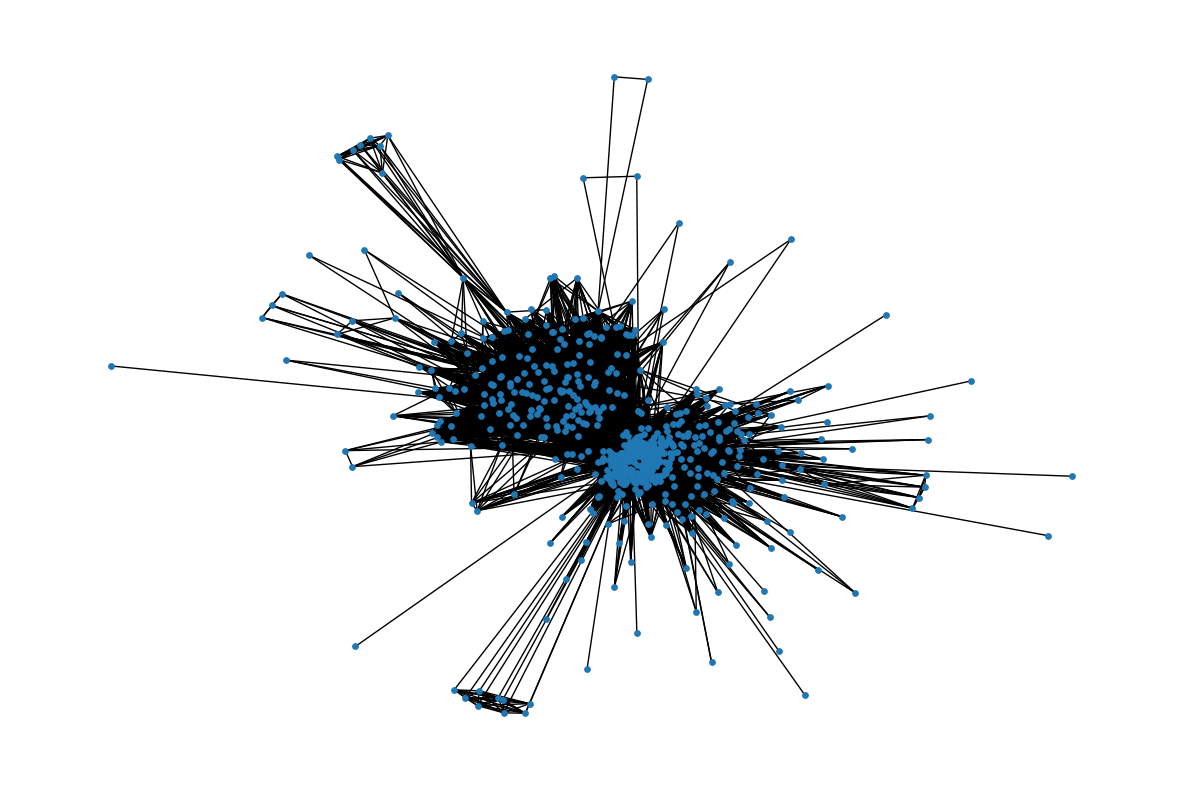

In [62]:
fig, ax = plt.subplots(figsize = (15, 10))
nx.draw(G, node_size=15)

# Ideas: Relate data with stocks markers; Predict big news (How to define big news?); Work on interactive visualization; price variation of stocks in the news period;

In [109]:
#degree distribution
nodes = [node for node in G.nodes()]
degree = [G.degree(node) for node in nodes]
btw = nx.betweenness_centrality(G)
betweenness = [btw[node] for node in nodes]
cls = nx.closeness_centrality(G)
closeness = [cls[node] for node in nodes]
graph_dict = {'nodes':nodes,
              'degree':degree,
              'betweenness':betweenness,
              'closeness':closeness}

In [111]:
df_graph = pd.DataFrame(graph_dict)

<AxesSubplot:xlabel='closeness', ylabel='Count'>

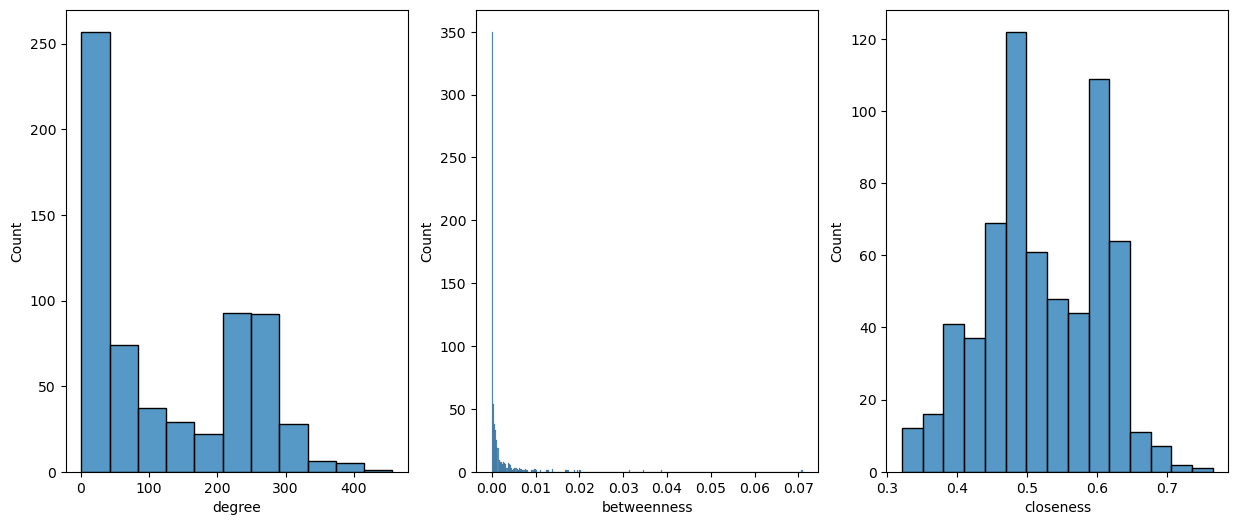

In [116]:
import seaborn as sns
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharex=False,
                                    figsize=(15, 6))
sns.histplot(data=df_graph, x="degree", ax=ax0)
sns.histplot(data=df_graph, x="betweenness", ax=ax1)
sns.histplot(data=df_graph, x="closeness", ax=ax2)

Text(0.5, 1.0, 'Empresas que mais aparecem em notícias')

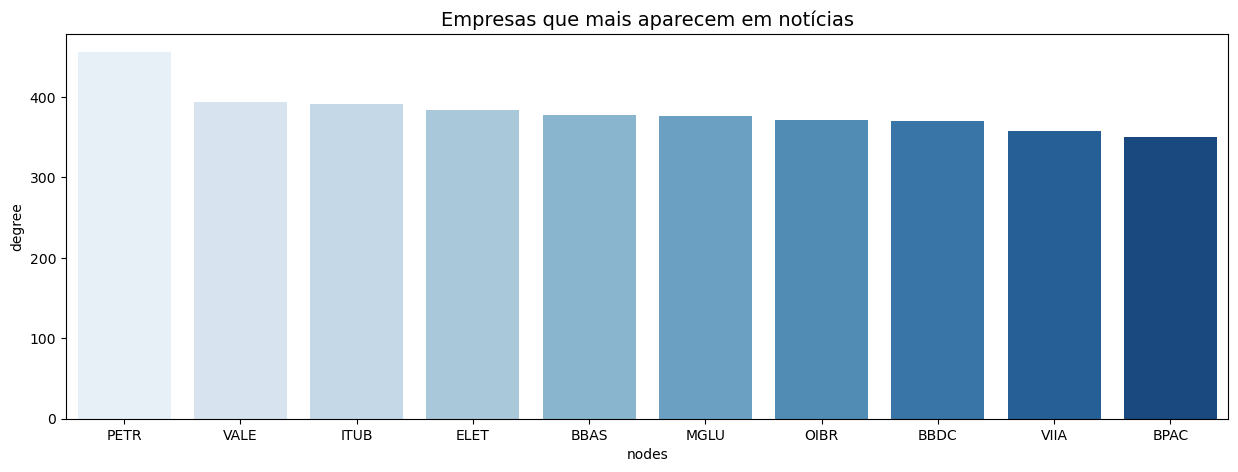

In [124]:
df_top_degree = df_graph.sort_values(by=['degree'], ascending=False)

fig, ax = plt.subplots(figsize = (15, 5))

splot = sns.barplot(data=df_top_degree[:10], x="nodes", y="degree", palette='Blues')
plt.title('Empresas que mais aparecem em notícias', fontsize=14)

#Ideia: Colorir cada barra de acordo com o sentimento 

Text(0.5, 1.0, 'Empresas com maior proximidade na rede')

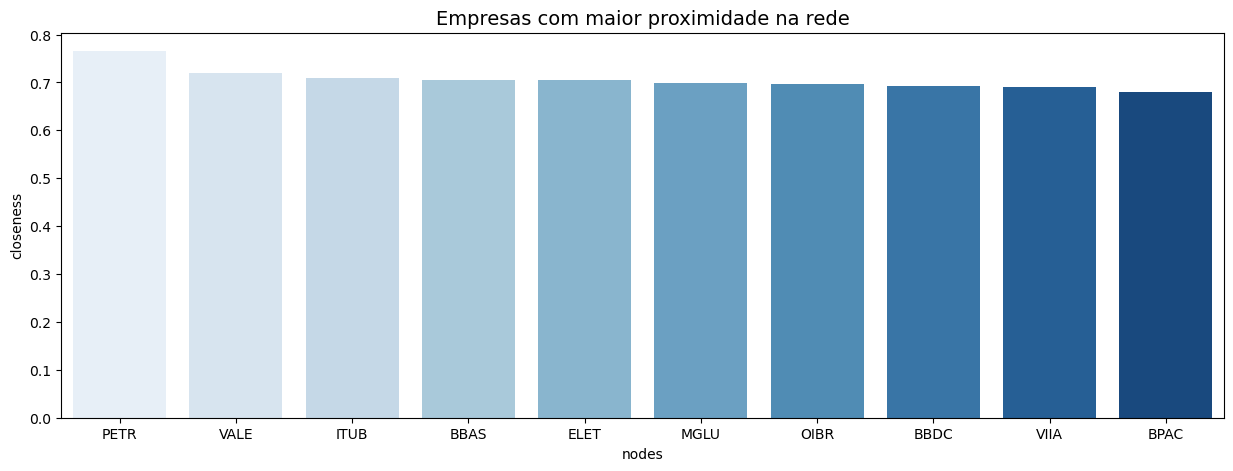

In [126]:
df_top_degree = df_graph.sort_values(by=['closeness'], ascending=False)

fig, ax = plt.subplots(figsize = (15, 5))

splot = sns.barplot(data=df_top_degree[:10], x="nodes", y="closeness", palette='Blues')
plt.title('Empresas com maior proximidade na rede', fontsize=14)

Text(0.5, 1.0, 'Empresas com maior intermediação na rede')

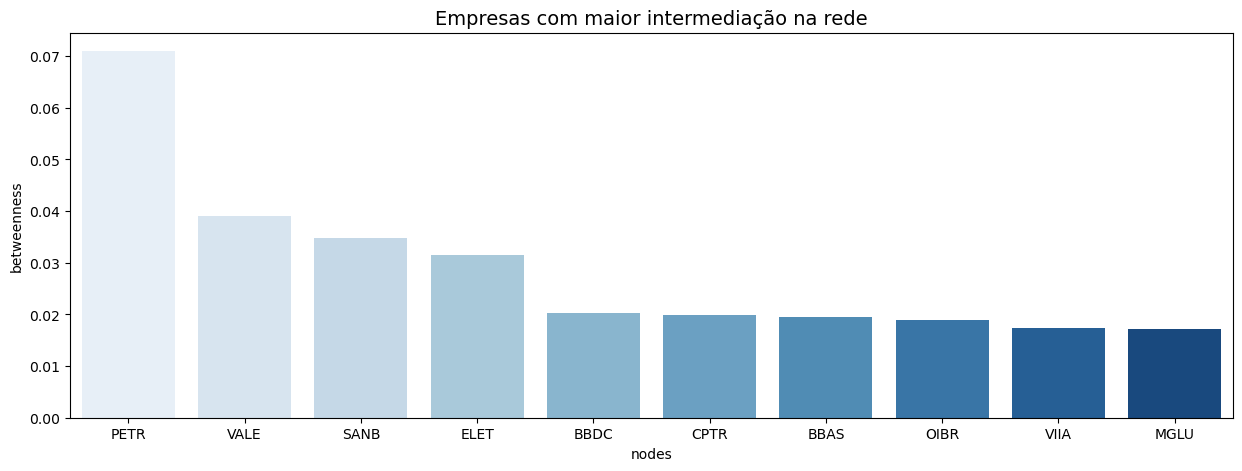

In [127]:
df_top_degree = df_graph.sort_values(by=['betweenness'], ascending=False)

fig, ax = plt.subplots(figsize = (15, 5))

splot = sns.barplot(data=df_top_degree[:10], x="nodes", y="betweenness", palette='Blues')
plt.title('Empresas com maior intermediação na rede', fontsize=14)

In [155]:
import networkx.algorithms.community as nx_comm

In [157]:
c = nx_comm.louvain_communities(G, seed=123)

In [158]:
len(c)

8

# Testing google news api

In [24]:
from GoogleNews import GoogleNews
googlenews = GoogleNews()

In [25]:
googlenews = GoogleNews(start='01/03/2023',end='10/03/2023')

In [26]:
googlenews.set_lang('pt')
googlenews.set_encode('utf-8')

In [37]:
googlenews.get_news('Banco do Brasil')

https://news.google.com/search?q=Banco%2Bdo%2BBrasil&hl=pt


In [40]:
t = googlenews.get_texts()

In [41]:
len(t)

400

In [43]:
t[1]

'Dividendos cancelados? O que está em jogo para Taesa (TAEE11 ...'

In [87]:
googlenews.clear()

In [46]:
import pandas as pd

In [92]:
googlenews=GoogleNews(start='01/01/2022',end='10/03/2023')
googlenews.set_lang('pt')
googlenews.search('TAEE11')
result=googlenews.result()
df=pd.DataFrame(result)
#print(df.head())

In [93]:
df

,title,media,date,datetime,desc,link,img
0,"Taesa (TAEE11) tem queda de 43,6% no lucro tri...",InfoMoney,8/02/2022,None,A Taesa (TAEE11) reportou lucro líquido consol...,https://www.infomoney.com.br/mercados/taesa-ta...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
1,"Taesa (TAEE11): ""Dividendo complementar será o...",Suno,8/02/2022,None,Durante a apresentação de resultados financeir...,https://www.suno.com.br/noticias/taesa-taee11-...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
2,Genial recomenda vender ações de Taesa (TAEE11...,SpaceMoney,8/02/2022,None,Genial recomenda vender ações de Taesa (TAEE11...,https://www.spacemoney.com.br/noticias/recomen...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
3,Taesa (TAEE11) distribuirá R$ 506 milhões em d...,InfoMoney,1/08/2022,None,Taesa (TAEE11) distribuirá R$ 506 milhões em d...,https://www.infomoney.com.br/mercados/taesa-ta...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
4,Taesa (TAEE11): Queda após balanço pode ser só...,Money Times,1/08/2022,None,"O BTG tem preço-alvo de R$ 32 para TAEE11, o q...",https://www.moneytimes.com.br/taesa-taee11-que...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
5,"Taesa (TAEE11): após resultados, analistas exp...",Suno,1/08/2022,None,Os resultados da Taesa (TAEE11) publicados nes...,https://www.suno.com.br/noticias/taesa-taee11-...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
6,"Taesa (TAEE11) tem alta de 94,6% do lucro regu...",InfoMoney,9/11/2022,None,A Taesa (TAEE11) reportou lucro líquido regula...,https://www.infomoney.com.br/mercados/resultad...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
7,Taesa (TAEE11) rouba coração de analistas com ...,Suno,á 1 mês,None,"Nesta sexta-feira (3), o Bank of America (BofA...",https://www.suno.com.br/noticias/taesa-taee11-...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
8,Taesa (TAEE11) pagará dividendos de R$ 460 mil...,Suno,6/01/2023,None,O conselho de administração da Taesa (TAEE11) ...,https://www.suno.com.br/noticias/taesa-taee11-...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
9,"Taesa (TAEE11), Estácio (YDUQ3): Veja as datas...",Suno,3/12/2022,None,"Nos dias 5 e 6 de dezembro, algumas empresas d...",https://www.suno.com.br/noticias/taesa-taee11-...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."


In [54]:
from newspaper import Article

In [94]:
for i in range(2,20):
    googlenews.getpage(i)
    result=googlenews.result()
    df=pd.DataFrame(result)

In [95]:
len(df)

191

In [74]:
list_=[]
for ind in df.index:
    print(ind)
    try:
        dict_={}
        article = Article(df['link'][ind])
        article.download()
        article.parse()
        article.nlp()
        dict_['Date']=df['date'][ind]
        dict_['Media']=df['media'][ind]
        dict_['Title']=article.title
        dict_['Article']=article.text
        dict_['Summary']=article.summary
        list_.append(dict_)
    except:
        pass
news_df=pd.DataFrame(list_)
#news_df.to_excel("articles.xlsx")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189


In [86]:
news_df

,Date,Media,Title,Article,Summary
0,á 3 semanas,InfoMoney,"Banco do Brasil (BBAS3) lucra R$ 9,04 bi no 4º...",O Banco do Brasil (BBAS3) registrou lucro líqu...,O Banco do Brasil (BBAS3) registrou lucro líqu...
1,á 3 semanas,E-Investidor,Banco do Brasil (BBAS3) supera pares em lucro:...,O balanço do Banco do Brasil (BBAS3) confirmou...,"Como mostramos nesta reportagem, os números re..."
2,á 3 semanas,Valor Investe,Banco do Brasil (BBAS3) sobe forte após balanç...,"Valor Empresas 360 Acesse indicadores, gráfico...","Valor Empresas 360 Acesse indicadores, gráfico..."
3,1/05/2022,InfoMoney,Banco do Brasil (BBAS3) tem lucro ajustado rec...,O Banco do Brasil (BBAS3) registrou lucro líqu...,Na comparação com o quarto trimestre de 2021 (...
4,1/05/2022,Suno,Banco do Brasil (BBAS3) anuncia pagamento de R...,Banco do Brasil (BBAS3) anuncia pagamento de R...,Banco do Brasil (BBAS3) anuncia pagamento de R...
...,...,...,...,...,...
167,á 7 horas,Suno,Mobly (MBLY3) e Tok&Stok negociam possível fus...,Mobly (MBLY3) e Tok&Stok negociam possível fus...,Mobly (MBLY3) e Tok&Stok negociam possível fus...
168,á 2 dias,Money Times,Santander (SANB11) fez bom negócio com venda d...,A venda de 40% da Webmotors anunciada pelo San...,A venda de 40% da Webmotors anunciada pelo San...
169,á 1 semana,Suno,Quais são os investimentos isentos de Imposto ...,Quais são os investimentos isentos de Imposto ...,Quais são os investimentos isentos de Imposto ...
170,á 5 dias,Forbes Brasil,Os maiores lucros anuais de empresas listadas ...,Foto: Berkah/GettyImages Acessibilidade L L A-...,Foto: Berkah/GettyImages Acessibilidade L L A-...


In [ ]:
from GoogleNews import GoogleNews
googlenews = GoogleNews()

googlenews = GoogleNews(start='01/03/2023',end='10/03/2023')

googlenews.set_lang('pt')
googlenews.set_encode('utf-8')

googlenews.get_news('Banco do Brasil')

t = googlenews.get_texts()

len(t)

t[1]

googlenews.clear()

import pandas as pd

googlenews=GoogleNews(start='01/01/2022',end='10/03/2023')
googlenews.set_lang('pt')
googlenews.search('TAEE11')
result=googlenews.result()
df=pd.DataFrame(result)
#print(df.head())

df

from newspaper import Article

for i in range(2,20):
    googlenews.getpage(i)
    result=googlenews.result()
    df=pd.DataFrame(result)

len(df)

list_=[]
for ind in df.index:
    print(ind)
    try:
        dict_={}
        article = Article(df['link'][ind])
        article.download()
        article.parse()
        article.nlp()
        dict_['Date']=df['date'][ind]
        dict_['Media']=df['media'][ind]
        dict_['Title']=article.title
        dict_['Article']=article.text
        dict_['Summary']=article.summary
        list_.append(dict_)
    except:
        pass
news_df=pd.DataFrame(list_)
#news_df.to_excel("articles.xlsx")

news_df